# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

# Reading Dataset

In [ ]:
Dataset = pd.read_csv("/content/drive/MyDrive/Project/DataSet/Features_Combined.csv")

In [ ]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,0.000056,0.000195,0.000281,0.000119,0.000119,0.003826,0.215466,0.779309,1.186640,0.456590,...,-11.354362,-7.726419,1.593689,-9.145521,-0.212657,-6.929526,-4.322876,-4.710403,-8.351056,calm
1,0.000203,0.000322,0.000439,0.000271,0.000265,0.003977,0.215628,0.776650,1.184454,0.458336,...,-10.847643,-6.654379,-1.465691,-6.797494,-3.094689,-6.291496,-4.512487,-4.711416,-8.531783,calm
2,0.000012,0.000048,0.000069,0.000038,0.000026,0.000213,0.008568,0.090721,0.256162,0.167146,...,-13.176809,-3.879907,-0.284960,-9.416859,0.278055,-8.788507,-4.630785,-7.198601,-8.594221,calm
3,0.000052,0.000118,0.000180,0.000401,0.000892,0.033079,0.149234,0.258785,0.233824,0.028744,...,-3.513651,-0.170925,-5.336728,1.003468,-3.568468,-5.821103,-3.620392,-4.771007,-3.185519,sad
4,0.000480,0.000538,0.000612,0.000840,0.001356,0.033393,0.147666,0.261492,0.236123,0.028882,...,-3.040922,-2.138857,-3.132770,-1.381131,-2.552100,-4.274347,-2.680576,-4.152612,-3.639899,sad


# Replacing Emotions by values

In [ ]:
Dataset = Dataset.replace("calm", 0)
Dataset = Dataset.replace("sad", 1)
Dataset = Dataset.replace("happy", 2)
Dataset = Dataset.replace("neutral", 3)
Dataset = Dataset.replace("angry", 4)
Dataset = Dataset.replace("disgust", 5)
Dataset = Dataset.replace("fear", 6)
Dataset = Dataset.replace("surprise", 7)

#Changing pandas dataframe to numpy array

In [ ]:
X = Dataset.iloc[:,:148].values
Y = Dataset.iloc[:,148:].values

In [ ]:
X  # Features

array([[ 5.60705848e-05,  1.94506836e-04,  2.81415560e-04, ...,
        -4.32287645e+00, -4.71040344e+00, -8.35105610e+00],
       [ 2.02672456e-04,  3.21870594e-04,  4.39332463e-04, ...,
        -4.51248750e+00, -4.71141584e+00, -8.53178279e+00],
       [ 1.21692983e-05,  4.75329180e-05,  6.92600006e-05, ...,
        -4.63078547e+00, -7.19860077e+00, -8.59422112e+00],
       ...,
       [ 4.63894321e-05,  3.03594774e-04,  1.18483054e-02, ...,
         4.53363991e+00, -5.57978153e+00,  6.27505407e-02],
       [ 6.50331236e-05,  3.16206871e-04,  1.18802942e-02, ...,
         4.18286107e+00, -4.87670749e+00, -3.55554137e-01],
       [ 6.54187716e-06,  3.34603828e-05,  1.99942710e-03, ...,
         2.40215874e+00, -7.08759308e+00, -4.80714273e+00]])

In [ ]:
Y  # Labels

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]])

#Normalizing the data

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[-0.1164991 , -0.10500371, -0.25439544, ..., -0.67023061,
        -0.35519796, -1.49860173],
       [-0.11634414, -0.10198271, -0.24022092, ..., -0.7150842 ,
        -0.3554285 , -1.53760257],
       [-0.1165455 , -0.10848986, -0.27343838, ..., -0.74306827,
        -0.92180967, -1.55107677],
       ...,
       [-0.11650933, -0.1024162 ,  0.78384069, ...,  1.42482956,
        -0.55317253,  0.31709879],
       [-0.11648962, -0.10211705,  0.78671198, ...,  1.34185079,
        -0.39306868,  0.22682859],
       [-0.11655145, -0.10882365, -0.1001879 , ...,  0.92061536,
        -0.89653102, -0.73382479]])

# One-Hot Encoding

In [ ]:
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [ ]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

# Reshaping the data 

In [ ]:
X_train = X_train.reshape(X_train.shape[0],1,148)
X_test = X_test.reshape(X_test.shape[0],1,148)

# Building the Neural Network

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, 148)))
model.add(Dense(8, activation='softmax'))

# Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               179400    
                                                                 
 dense (Dense)               (None, 8)                 1208      
                                                                 
Total params: 180,608
Trainable params: 180,608
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
116/116 [==============================] - 4s 11ms/step - loss: 1.8405 - accuracy: 0.2960 - val_loss: 1.6832 - val_accuracy: 0.4089
Epoch 2/50
116/116 [==============================] - 1s 5ms/step - loss: 1.6089 - accuracy: 0.4124 - val_loss: 1.5393 - val_accuracy: 0.4349
Epoch 3/50
116/116 [==============================] - 1s 6ms/step - loss: 1.4664 - accuracy: 0.4566 - val_loss: 1.4261 - val_accuracy: 0.4751
Epoch 4/50
116/116 [==============================] - 1s 5ms/step - loss: 1.3621 - accuracy: 0.4997 - val_loss: 1.3560 - val_accuracy: 0.5098
Epoch 5/50
116/116 [==============================] - 1s 5ms/step - loss: 1.2821 - accuracy: 0.5350 - val_loss: 1.3125 - val_accuracy: 0.4989
Epoch 6/50
116/116 [==============================] - 1s 5ms/step - loss: 1.2196 - accuracy: 0.5572 - val_loss: 1.2580 - val_accuracy: 0.5260
Epoch 7/50
116/116 [==============================] - 1s 5ms/step - loss: 1.1614 - accuracy: 0.5846 - val_loss: 1.2203 - val_accuracy: 0.5586
Epoch

# Checking Performance of the Model

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
# Classification Report
target_names = ['calm', 'sad', 'happy', 'neutral', 'angry', 'disgust', 'fear', 'surprise']
print(classification_report(test, pred, target_names=target_names))

              precision    recall  f1-score   support

        calm       0.77      0.83      0.80       125
         sad       0.73      0.58      0.65       118
       happy       0.78      0.78      0.78       111
     neutral       0.75      0.88      0.81       120
       angry       0.83      0.77      0.80       111
     disgust       0.81      0.77      0.79       125
        fear       0.79      0.77      0.78       101
    surprise       0.76      0.82      0.79       111

    accuracy                           0.78       922
   macro avg       0.78      0.78      0.77       922
weighted avg       0.78      0.78      0.77       922



# **Confusion Matrix**

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test, pred)

array([[104,   4,   2,   8,   0,   5,   1,   1],
       [ 18,  69,   3,  15,   0,   1,   9,   3],
       [  2,   5,  87,   2,   4,   5,   3,   3],
       [  6,   1,   1, 106,   0,   0,   1,   5],
       [  1,   0,   5,   1,  85,   7,   4,   8],
       [  2,   6,   2,   5,   9,  96,   1,   4],
       [  0,   7,   5,   1,   4,   1,  78,   5],
       [  2,   3,   6,   4,   0,   3,   2,  91]])

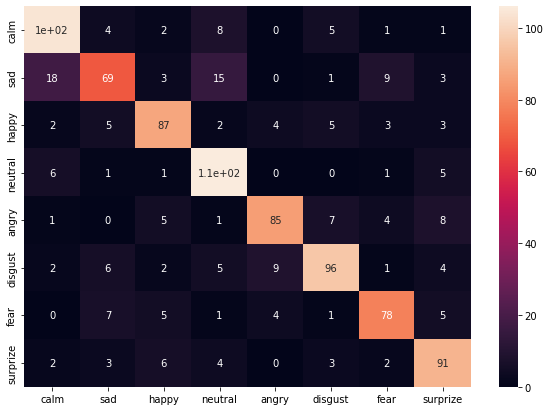

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(test, pred), index = ["calm", "sad", "happy", "neutral", "angry", "disgust", "fear", "surprize"], columns = ["calm", "sad", "happy", "neutral", "angry", "disgust", "fear", "surprize"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Plotting the Performance metrices

### Accuracy Graph

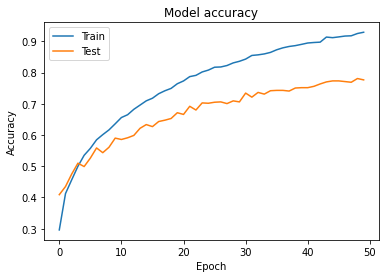

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Loss Graph

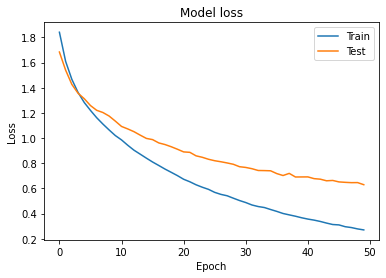

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()